
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of stocks from the S&P 400.  Construct portfolios from the 400 stocks in the S&P 400 mid cap index and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['sp400-galaxy']

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate=0, annual_returns='3 Yr')
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,SD 1 Yr,SD 3 Yr,SD 5 Yr,Annual Returns,Std Dev,Sharpe Ratio
0,AA,Alcoa,US Stocks:Materials,-89.64,-72.35,-26.52,-27.76,27.56,86.63,49.93,42.40,53.22,61.52,-27.76,53.22,-1477.39
1,AAL,American Airlines Group,US Stocks:Industrials,-7.65,-85.06,-22.13,-17.84,-1.35,103.72,55.24,43.82,44.64,43.31,-17.84,44.64,-796.38
2,AAON,AAON,US Stocks:Industrials,803.10,-46.59,6.02,45.69,25.97,62.33,24.98,49.72,43.42,38.52,45.69,43.42,1.05
3,ACHC,Acadia Healthcare,US Stocks:Healthcare,-93.33,-92.87,-68.47,-29.94,-0.71,68.03,45.67,59.75,42.26,40.30,-29.94,42.26,-1265.26
4,ACI,Albertsons,US Stocks:Consumer Staples,-17.28,47.02,10.42,-0.00,-0.00,43.27,29.35,14.02,17.20,28.12,-0.00,17.20,-0.00
5,ACM,AECOM,US Stocks:Industrials,120.04,-10.23,11.92,13.70,24.09,39.63,16.41,20.47,22.69,23.30,13.70,22.69,0.60
6,ADC,Agree Realty,US Stocks:Real Estate,1.96,27.62,39.23,7.90,8.09,28.76,18.10,15.82,18.30,17.54,7.90,18.30,0.43
7,AFG,American Financial Group,US Stocks:Financials,-13.74,-11.14,8.69,5.64,26.56,42.36,25.92,23.11,21.77,22.97,5.64,21.77,0.26
8,AGCO,AGCO,US Stocks:Industrials,40.51,-30.14,-13.70,-5.03,16.94,67.70,22.19,25.31,33.13,33.29,-5.03,33.13,-166.64
9,AIT,Applied Industrial Technologies,US Stocks:Industrials,-36.81,-41.05,24.98,34.42,35.81,63.46,30.21,32.41,28.11,28.84,34.42,28.11,1.22


In [6]:
# Rank
rank = bb.rank(df, rank_by='Sharpe Ratio', group_by='Asset Subclass', num_per_group=1)
rank_filtered = rank
#rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered = rank_filtered.head(20)
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,SD 1 Yr,SD 3 Yr,SD 5 Yr,Annual Returns,Std Dev,Sharpe Ratio
354,TXNM,TXNM Energy,US Stocks:Utilities,2.94,55.25,49.59,7.75,8.16,35.80,22.09,18.72,15.84,17.32,7.75,15.84,0.49
98,CVLT,CommVault Systems,US Stocks:Technology,54.69,37.79,68.39,40.93,32.54,66.98,34.78,32.06,29.07,29.71,40.93,29.07,1.41
317,SBRA,Sabra Health Care REIT,US Stocks:Real Estate,4.23,27.00,34.81,24.04,16.29,28.58,18.13,16.51,20.71,27.08,24.04,20.71,1.16
93,CRS,Carpenter Technology,US Stocks:Materials,373.35,48.90,149.76,81.40,62.26,77.35,32.77,48.19,47.73,50.58,81.40,47.73,1.71
118,EME,Emcor,US Stocks:Industrials,282.37,-14.80,20.73,57.17,45.52,53.76,23.77,27.90,32.94,30.77,57.17,32.94,1.74
115,EHC,Encompass Health,US Stocks:Healthcare,395.32,91.88,40.88,32.31,18.25,55.63,26.76,20.78,26.81,29.97,32.31,26.81,1.21
362,UNM,Unum,US Stocks:Financials,-34.54,21.38,61.07,40.83,41.30,56.80,37.08,26.51,26.48,27.89,40.83,26.48,1.54
15,AM,Antero Midstream,US Stocks:Energy,-36.73,50.60,34.21,29.84,45.41,44.98,33.95,18.38,24.01,27.60,29.84,24.01,1.24
321,SFM,Sprouts Farmers Market,US Stocks:Consumer Staples,208.61,45.59,163.41,79.53,52.24,33.71,18.76,39.92,32.31,34.32,79.53,32.31,2.46
180,HRB,H&R Block,US Stocks:Consumer Discretionary,223.96,67.47,35.71,35.37,36.75,33.62,20.31,21.13,26.05,29.97,35.37,26.05,1.36


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Ranked Portfolio'
}
top10 = list(rank_filtered['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': None},
    'Investment Option': {'weight_by': 'DS Vola'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,TXNM,CVLT,SBRA,CRS,EME,EHC,UNM,AM,SFM,HRB,NYT,Ranked Portfolio
Annual Returns,7.75,40.93,24.04,81.40,57.17,32.31,40.83,29.84,79.53,35.37,11.54,37.94
Std Dev,15.84,29.07,20.71,47.73,32.94,26.81,26.48,24.01,32.31,26.05,31.21,22.71
Sharpe Ratio,0.49,1.41,1.16,1.71,1.74,1.21,1.54,1.24,2.46,1.36,0.37,1.67
Weight,0.10,0.06,0.12,0.07,0.09,0.08,0.06,0.06,0.11,0.11,0.15,1.00
Worst Typical Down Year,-23.93,-17.21,-17.38,-14.06,-8.71,-21.31,-12.13,-18.18,14.91,-16.73,-50.88,-7.47
Black Swan,-39.77,-46.28,-38.09,-61.79,-41.65,-48.12,-38.61,-42.19,-17.40,-42.78,-82.09,-30.18


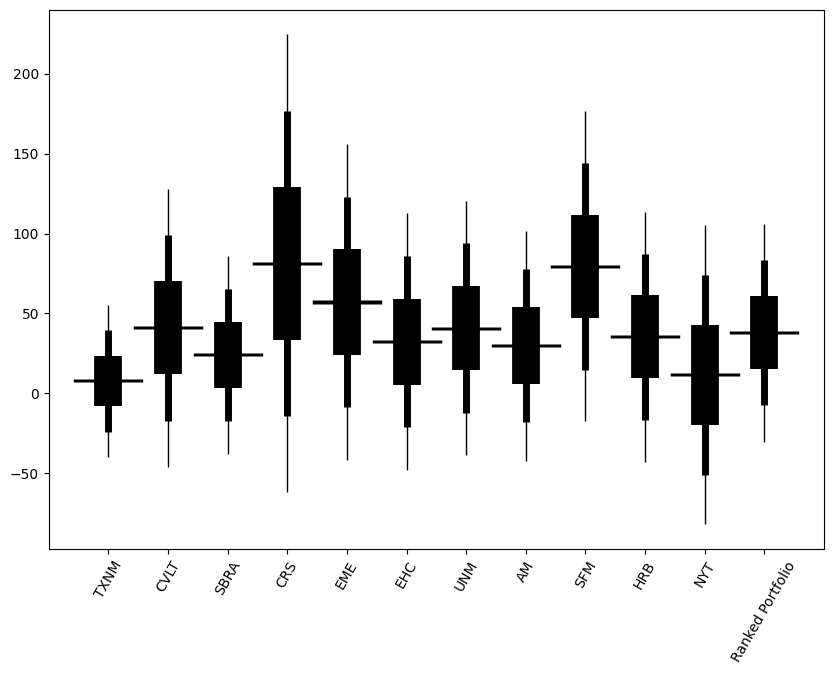

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

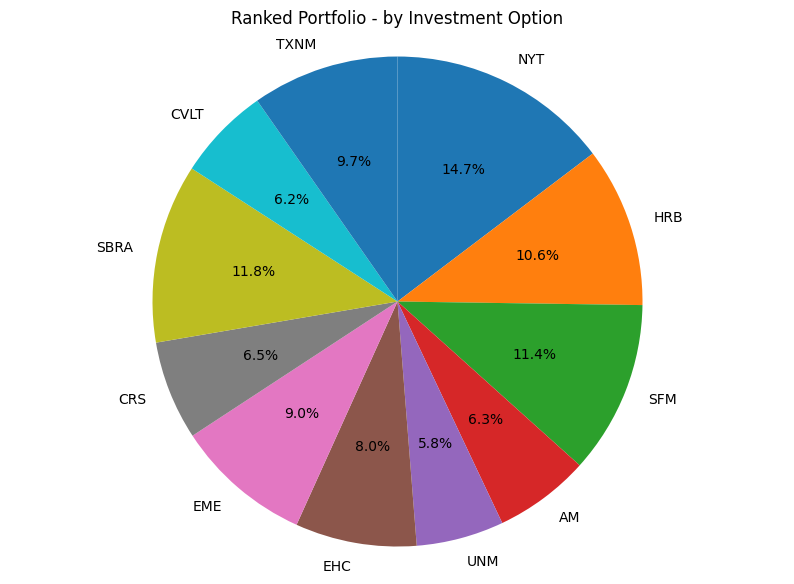

NYT    0.15
HRB    0.11
SFM    0.11
AM     0.06
UNM    0.06
EHC    0.08
EME    0.09
CRS    0.07
SBRA   0.12
CVLT   0.06
TXNM   0.10



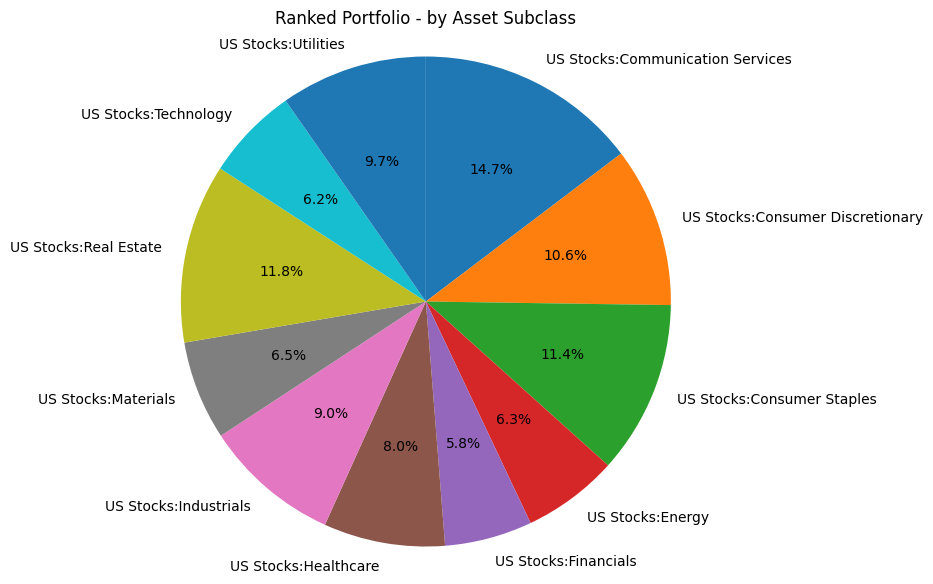

US Stocks:Communication Services   0.15
US Stocks:Consumer Discretionary   0.11
US Stocks:Consumer Staples         0.11
US Stocks:Energy                   0.06
US Stocks:Financials               0.06
US Stocks:Healthcare               0.08
US Stocks:Industrials              0.09
US Stocks:Materials                0.07
US Stocks:Real Estate              0.12
US Stocks:Technology               0.06
US Stocks:Utilities                0.10



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option', 'Asset Subclass'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    TXNM                           0.0970
    CVLT                           0.0616
    SBRA                           0.1182
    CRS                            0.0654
    EME                            0.0902
    EHC                            0.0801
    UNM                            0.0578
    AM                             0.0631
    SFM                            0.1142
    HRB                            0.1055
    NYT                            0.1468


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = False

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).